<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [74]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [75]:
# Read CSV
house_csv = "../../DATA/Sacramento_transactions.csv"

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [76]:
# ANSWER
df=pd.read_csv(house_csv)

In [77]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [78]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [79]:
print(df.shape)
print(df.info())

(985, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB
None


In [80]:
df.city.unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [81]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [82]:
df[df['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [83]:
# Correct the typo to unknown 
df.iloc[757,7] = 'Unknown'

In [84]:
df.groupby('type')["price"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Condo,54.0,150082.185185,74431.071849,40000.0,98500.0,130000.0,205208.0,360000.0
Multi-Family,13.0,224534.692308,85061.706748,100000.0,170000.0,221250.0,282400.0,416767.0
Residential,917.0,239186.162486,140377.574005,1551.0,150000.0,218000.0,305000.0,884790.0
Unknown,1.0,275000.000000,NaN,275000.0,275000.0,275000.0,275000.0,275000.0


The unknown type property has the pricing in between residential and multi-family. 
Since the majority of the house type is residential, we can put it under residential type. 

In [85]:
# Correct the typo to unknown 
df.iloc[757,7] = 'Residential'
df.groupby('type')["price"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Condo,54.0,150082.185185,74431.071849,40000.0,98500.0,130000.0,205208.0,360000.0
Multi-Family,13.0,224534.692308,85061.706748,100000.0,170000.0,221250.0,282400.0,416767.0
Residential,918.0,239225.175381,140305.990585,1551.0,150000.0,218500.0,305000.0,884790.0


In [86]:
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [87]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


Note on the data
- sq_ft has a minimum of 0. Ricky mentioned that this is an off-plan (not yet built)
- 0 bed and 0 baths are also strainge.


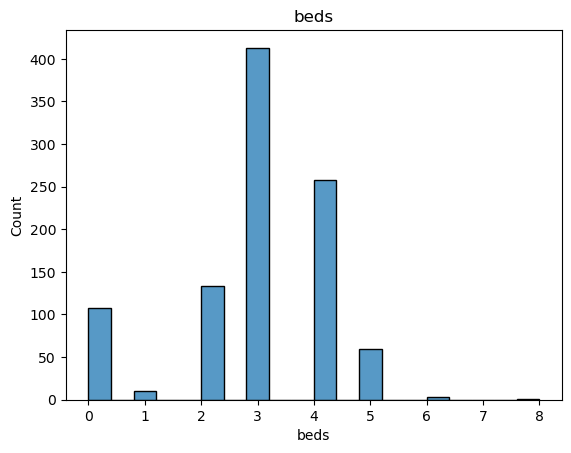

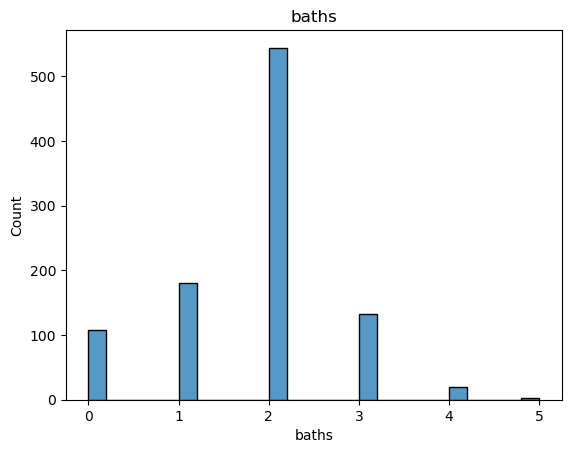

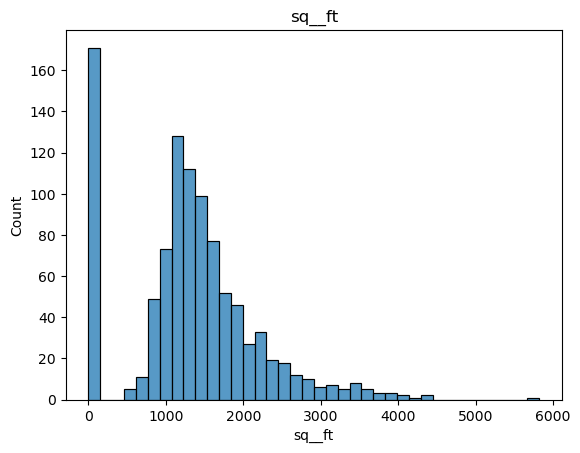

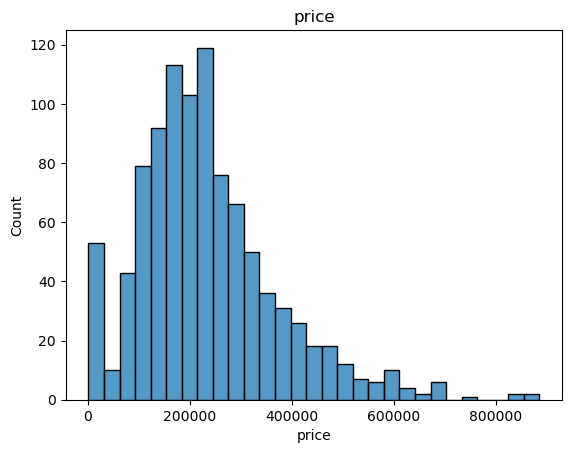

In [88]:
for_histogram = ['beds','baths','sq__ft','price']

for i in for_histogram:
    sns.histplot(df, x=i)
    plt.title(i)
    plt.show()

Note:
- Majority of the houses has 3 bedrooms. 
- Majority of the houses has 2 bathrooms.
- The sqft and price are positive skewed. 

In [89]:
df[df["price"] <= 1551].value_counts()

street                city     zip    state  beds  baths  sq__ft  type         sale_date                     price  latitude   longitude  
3720 VISTA DE MADERA  LINCOLN  95648  CA     3     3      0       Residential  Fri May 16 00:00:00 EDT 2008  1551   38.851645  -121.231742    1
Name: count, dtype: int64

Note:
- Maybe I should separate the one with sq__ft zero seperately. That would be its own category and should not be compared. 
- But I also want to know whether in the off-plan category, are there any differences in type and price. 
- So, I'm making a new column. 

In [90]:
a = df[df["sq__ft"] == 0].index

In [91]:
df['already_build'] = 'yes'

In [92]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,already_build
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,yes
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,yes
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,yes
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,yes
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,yes


In [93]:
df.iloc[a,12] = 'off_plan'

In [94]:
df.groupby('already_build')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
already_build,,,,,,,,
off_plan,171.0,256497.818713,203819.372525,1551.0,4897.0,270000.0,400000.00,879000.0
yes,814.0,229448.369779,119825.576060,2000.0,148750.0,207986.5,284973.25,884790.0


<Axes: xlabel='already_build', ylabel='price'>

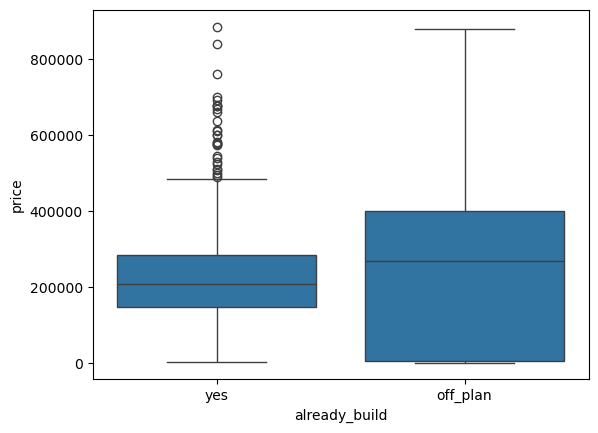

In [95]:
sns.boxplot(df, x='already_build', y='price')

<Axes: xlabel='price', ylabel='Count'>

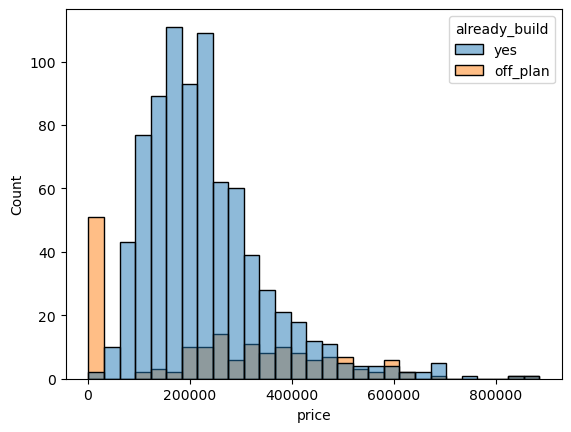

In [96]:
sns.histplot(df, x='price', hue='already_build')

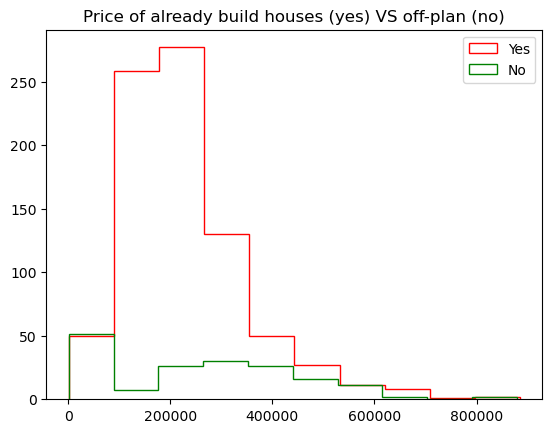

In [97]:
y_count, y_bin, y_fig = plt.hist(df[df["already_build"] == 'yes']['price'], histtype='step', color='red', label='Yes')
n_count, n_bin, n_fig = plt.hist(df[df['already_build'] == 'off_plan']['price'], histtype='step', color='green', label='No')
plt.title('Price of already build houses (yes) VS off-plan (no)')
plt.legend()
plt.show()

In [98]:
n_bin

array([  1551. ,  89295.9, 177040.8, 264785.7, 352530.6, 440275.5,
       528020.4, 615765.3, 703510.2, 791255.1, 879000. ])

In [99]:
n_count.max()/171

0.2982456140350877

About 30% of off-plan houses costs between $1551 - $89296. It is much lower than the already build house even though the median and Q3 and the max look lik it is similar to already built house. 

Anyway, I think I'll exclude the off_plan from the pricing analysis. Maybe it can have its own regression. 

In [100]:
df.groupby('type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Condo,54.0,150082.185185,74431.071849,40000.0,98500.0,130000.0,205208.0,360000.0
Multi-Family,13.0,224534.692308,85061.706748,100000.0,170000.0,221250.0,282400.0,416767.0
Residential,918.0,239225.175381,140305.990585,1551.0,150000.0,218500.0,305000.0,884790.0


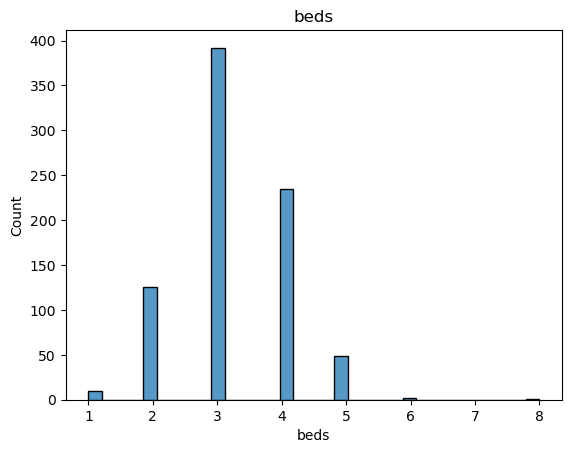

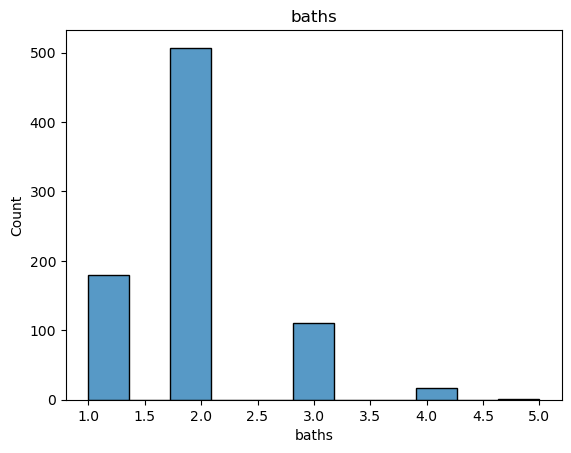

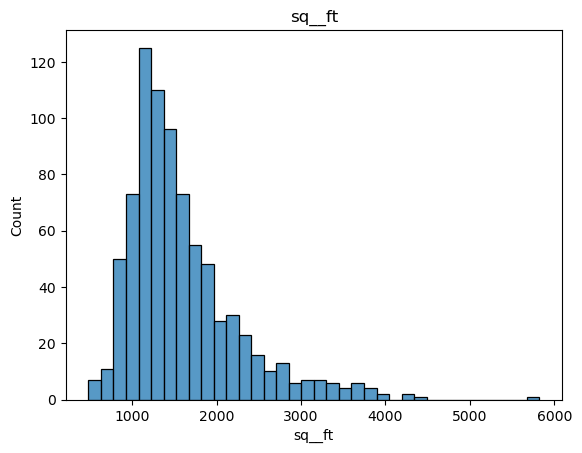

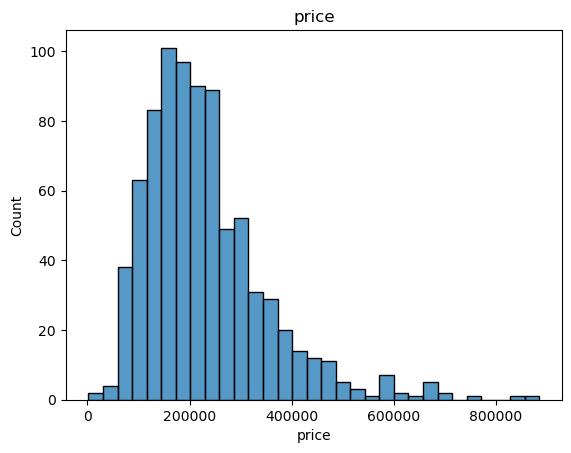

In [101]:
# Plotting histogram without the off-plan
for i in for_histogram:
    sns.histplot(df[df['already_build'] != 'off_plan'], x=i)
    plt.title(i)
    plt.show()

The data now looks more normal. 

#### 2.2 List all possible variables which might be Predictor variable.

### ANSWER
* Location like latitude and longtitude using folium (find pattern)
* Type of the houses (using ANOVA)
* number of beds (ANOVA)
* number baths (ANOVA)
* sq_ft. (regression)

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [102]:
# ANSWER
# From now, I'll exclude the off-plan data. 
df_yes = df[df['already_build'] == 'yes']
df_no = df[df['already_build'] == 'off_plan']
print(df_yes.shape)
print(df_no.shape)


(814, 13)
(171, 13)


In [103]:
df_yes[for_histogram].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.654746,0.695710,0.441988
baths,0.654746,1.000000,0.724631,0.501820
sq__ft,0.695710,0.724631,1.000000,0.693708
price,0.441988,0.501820,0.693708,1.000000


The price is highly correlated with sq_ft (r = 0.693708).

In [104]:
df_no[for_histogram].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.965246,NaN,0.495577
baths,0.965246,1.000000,NaN,0.509321
sq__ft,NaN,NaN,NaN,NaN
price,0.495577,0.509321,NaN,1.000000


The pricing for the off-plan probably depends on something else. Maybe the location. Note to do folium. 

<Axes: xlabel='sq__ft', ylabel='price'>

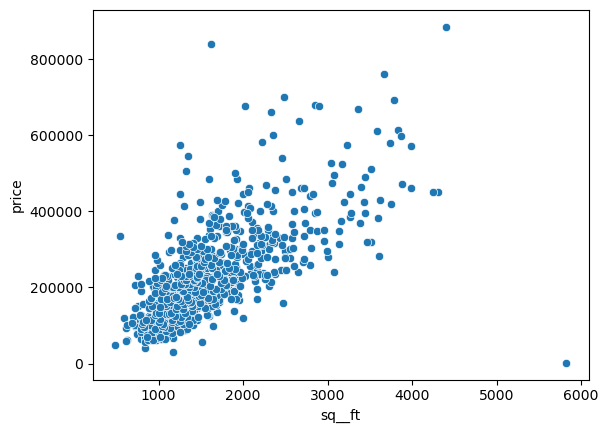

In [105]:
sns.scatterplot(df_yes, x='sq__ft', y='price')

In [106]:
# Remove outlier at sq__ft 6000. 
df_yes[df_yes['sq__ft'] > 5500]
df_yes = df_yes[df_yes['sq__ft'] < 5500]

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

### ANSWER 
For the house that is not off-plan, it is probably linear regression. 

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

### ANSWER
See below.


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [107]:
# ANSWER
x = np.array(df_yes['sq__ft'])
y = np.array(df_yes['price'])
N = len(y)

print(N)

813


##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [108]:
# ANSWER
y_bar = np.mean(y)
x_bar = np.mean(x)

top=sum((y-y_bar) * (x-x_bar))
bottom = sum((x-x_bar)**2)

beta1 = top/bottom
print('Beta 1 =', beta1)

Beta 1 = 134.64083993681086


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [109]:
# ANSWER
beta0 = y_bar-beta1*x_bar
print('Beta 0 =', beta0)

Beta 0 = 16195.54559635208


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [110]:
# ANSWER
y_hat = beta0 + beta1*x

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [111]:
# ANSWER
residual = y-y_hat
absolute = abs(y-y_hat)
print(absolute[:5])

[ 69533.28778353 105109.40580261  54489.65418605  61602.54122251
  41604.29502599]


In [112]:
print(residual[:10])

[ -69533.28778353 -105109.40580261  -54489.65418605  -61602.54122251
  -41604.29502599  -77341.56800545  -73944.03288659  -83665.81420198
  -47987.57597689  -71556.94816394]


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [113]:
# ANSWER
ss_res = sum(residual**2)
ss_tot = sum((y-y_bar)**2)
Rsquare = 1 - (ss_res/ss_tot)
print('Rsquare = ', Rsquare)


Rsquare =  0.530919105587008


In [114]:
from sklearn.metrics import mean_squared_error 

mean_squared_error(y,y_hat)

6705257367.929072

##### 2.7.F [BONUS] Draw Plot of Predicted Line

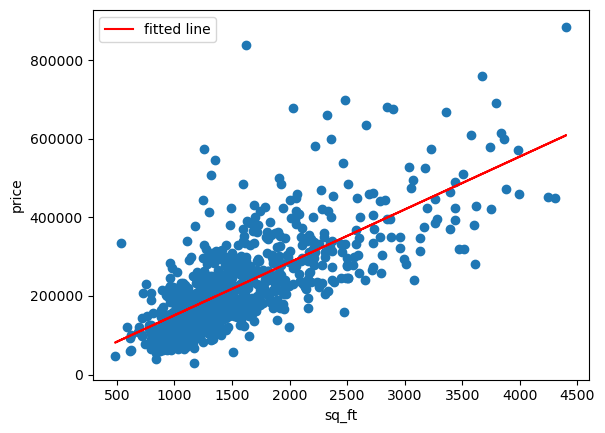

In [115]:
# ANSWER
plt.scatter(x,y)
plt.plot(x,y_hat, color='red', label='fitted line')
plt.legend()
plt.xlabel('sq_ft')
plt.ylabel('price')
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

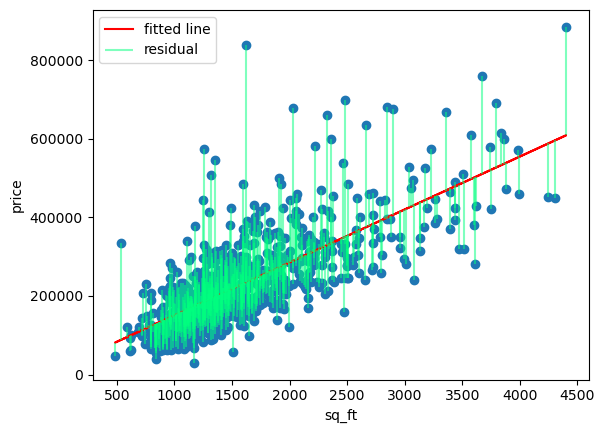

In [116]:
# ANSWER
plt.scatter(x,y)
plt.plot(x,y_hat, color='red', label='fitted line')
plt.vlines(x,y_hat,y_hat+residual, color='springgreen', alpha=0.5, label='residual')
plt.legend()
plt.xlabel('sq_ft')
plt.ylabel('price')
plt.show()

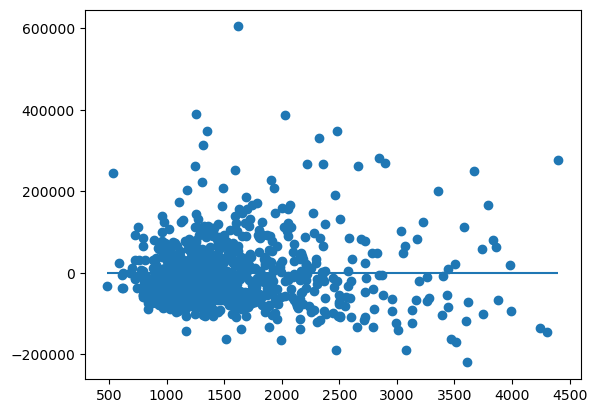

In [117]:
#residual plot
plt.scatter(x=x,y=residual)
plt.hlines(y=0, xmin=min(x), xmax=max(x))
plt.show()

The residual gathers around 0. But, there are some positive residuals. 

### Check the answers with sns and scipy.

slope, intercept, r, p, sterr : 134.6408399368112 16195.545596351556 0.7286419598039956 1.8848261798238698e-135 4.444020773651632
Rsquared = 0.5309191055870075


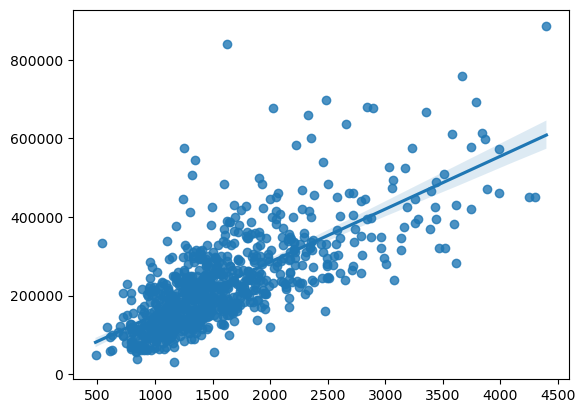

In [118]:

fig = sns.regplot(x=x, y=y,fit_reg=True)
slope, intercept, r, p, sterr = scipy.stats.linregress(x,y)
print('slope, intercept, r, p, sterr :', slope, intercept, r, p, sterr)
print("Rsquared =",r**2)

<Axes: >

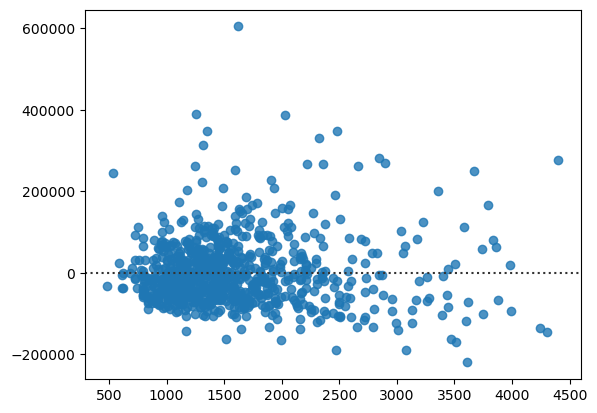

In [119]:
sns.residplot(x=x,y=y)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [120]:
# ANSWER
sq_ft = 1204
estimate_price = beta0 + beta1*sq_ft

print("Predicted price : ${:.2f}".format(estimate_price))

Predicted price : $178303.12




---



---



> > > > > > > > > © 2023 Institute of Data


---



---





## What if I transform the price data and the square price to normal distribution before linear regression?

In [121]:
from scipy import stats
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Probplot against normal distribution')

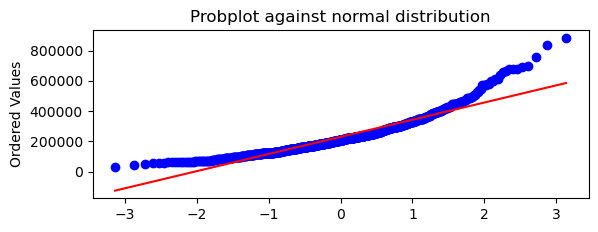

In [122]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(df_yes['price'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

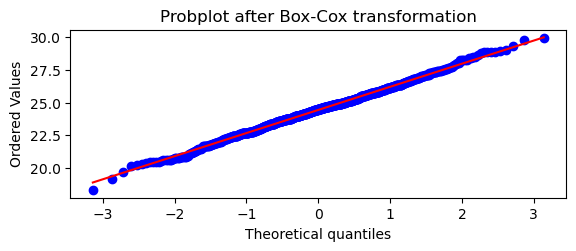

In [123]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
price_t, _ = stats.boxcox(df_yes['price'])
prob = stats.probplot(price_t, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [124]:
sq_t, _ = stats.boxcox(df_yes['sq__ft'])

slope, intercept, r, p, sterr : 50.95627162942639 -105.46101060549333 0.7344273509019855 1.1615626141680045e-138 1.6535148682070784
Rsquared = 0.5393835337529082


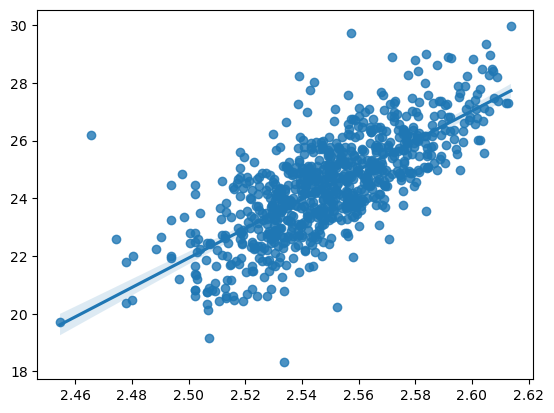

In [125]:
import scipy

fig = sns.regplot(x=sq_t, y=price_t,fit_reg=True)
slope, intercept, r, p, sterr = scipy.stats.linregress(sq_t,price_t)
print('slope, intercept, r, p, sterr :', slope, intercept, r, p, sterr)
print("Rsquared =",r**2)

<Axes: >

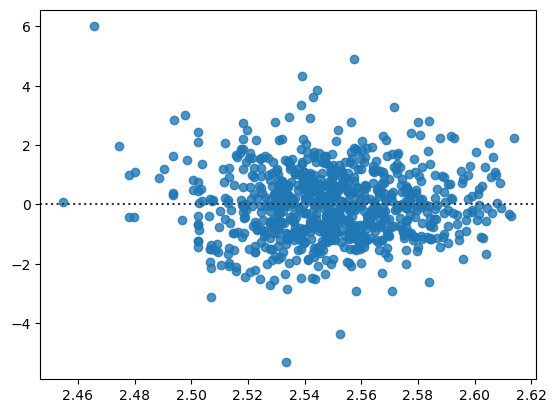

In [126]:
sns.residplot(x=sq_t,y=price_t)

In [127]:
from sklearn.metrics import mean_squared_error 

y = price_t
y_hat = 50.95627162942639 - 105.46101060549333 * sq_t
mean_squared_error(y,y_hat)

58733.15045766897

I thought that if the data is more normal, it will improve R-squared. But, I might have misunderstood what R-squared is. But, looking at mse, after transforming the data, the MSE has reduced from 6705257367.929072 to 58733.15045766897. I think the transformation does improve the model. 

---
---

## Do it for fun. Explore the off-plan property with Folium

In [128]:
df_no.describe(include='all')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,already_build
count,171,171,171.000000,171,171.000000,171.000000,171.0,171,171,171.000000,171.000000,171.000000,171
unique,170,20,NaN,1,NaN,NaN,NaN,2,5,NaN,NaN,NaN,1
top,7 CRYSTALWOOD CIR,LINCOLN,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN,off_plan
freq,2,66,NaN,171,NaN,NaN,NaN,159,71,NaN,NaN,NaN,171
mean,NaN,NaN,95699.315789,NaN,1.327485,0.900585,0.0,NaN,NaN,256497.818713,38.753816,-121.247903,NaN
std,NaN,NaN,62.826884,NaN,1.836975,1.249258,0.0,NaN,NaN,203819.372525,0.141936,0.167014,NaN
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,0.0,NaN,NaN,1551.000000,38.287785,-121.551704,NaN
25%,NaN,NaN,95648.000000,NaN,0.000000,0.000000,0.0,NaN,NaN,4897.000000,38.670439,-121.312681,NaN
50%,NaN,NaN,95677.000000,NaN,0.000000,0.000000,0.0,NaN,NaN,270000.000000,38.792180,-121.289586,NaN
75%,NaN,NaN,95757.000000,NaN,3.000000,2.000000,0.0,NaN,NaN,400000.000000,38.884716,-121.203946,NaN


In [129]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 73 to 973
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   street         171 non-null    object 
 1   city           171 non-null    object 
 2   zip            171 non-null    int64  
 3   state          171 non-null    object 
 4   beds           171 non-null    int64  
 5   baths          171 non-null    int64  
 6   sq__ft         171 non-null    int64  
 7   type           171 non-null    object 
 8   sale_date      171 non-null    object 
 9   price          171 non-null    int64  
 10  latitude       171 non-null    float64
 11  longitude      171 non-null    float64
 12  already_build  171 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.7+ KB


In [130]:
df_no.groupby('type')['city'].value_counts()

type         city           
Condo        ROSEVILLE           4
             SACRAMENTO          2
             LINCOLN             2
             CAMERON PARK        1
             ELK GROVE           1
             GOLD RIVER          1
             FOLSOM              1
Residential  LINCOLN            64
             EL DORADO HILLS    20
             ROSEVILLE          16
             SACRAMENTO         13
             ROCKLIN             9
             CAMERON PARK        7
             RANCHO CORDOVA      7
             ELK GROVE           6
             PLACERVILLE         5
             AUBURN              2
             WEST SACRAMENTO     2
             RANCHO MURIETA      1
             SHINGLE SPRINGS     1
             RIO LINDA           1
             GALT                1
             GARDEN VALLEY       1
             FORESTHILL          1
             FOLSOM              1
             WILTON              1
Name: count, dtype: int64

In [131]:
import folium

In [132]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )

    return base_map

In [133]:
sacramento_coordinates = (38.575764,-121.478851)
m = generateBaseMap(default_location=sacramento_coordinates)
#display(m)

In [134]:
df_no.shape

(171, 13)

In [135]:
df_no['price_color'] = pd.cut(df_no['price'],bins=4, labels=['cadetblue','blue','orange','red'])

/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1280136293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['price_color'] = pd.cut(df_no['price'],bins=4, labels=['cadetblue','blue','orange','red'])


In [136]:
df_no.groupby(by='price_color')['price'].agg([min,max])

/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1299870431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no.groupby(by='price_color')['price'].agg([min,max])
/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1299870431.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_no.groupby(by='price_color')['price'].agg([min,max])
/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1299870431.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used direct

,min,max
price_color,,
cadetblue,1551,220000
blue,222500,438700
orange,445000,622500
red,680000,879000


In [137]:
for i in range(0,171):
    icon_color=df_no.iloc[i]['price_color']
    icon=folium.Icon(color=icon_color)
    folium.CircleMarker(location=[df_no.iloc[i]['latitude'], df.iloc[i]['longitude']],
                  popup=df.iloc[i]['price'],
                  radius=5, 
                  fill=True,
                  color=icon_color,
                  legend_label=True).add_to(m)

m

What I'm trying to do here is to see if folium can show me if there are a particular location that has a cheap price for off-plan houses. I don't think it says anything much. It seems to be one particular street that sells in the cheapest range. The next cheapest 222500 - 238700, many are toward the south, Elk Grove.


In [138]:
df_no.groupby(by='price_color')['price'].agg([min,max])

/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1299870431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no.groupby(by='price_color')['price'].agg([min,max])
/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1299870431.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_no.groupby(by='price_color')['price'].agg([min,max])
/var/folders/ky/xbh1f3x917jblb5qc_7nln7wbvnf05/T/ipykernel_46484/1299870431.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used direct

,min,max
price_color,,
cadetblue,1551,220000
blue,222500,438700
orange,445000,622500
red,680000,879000


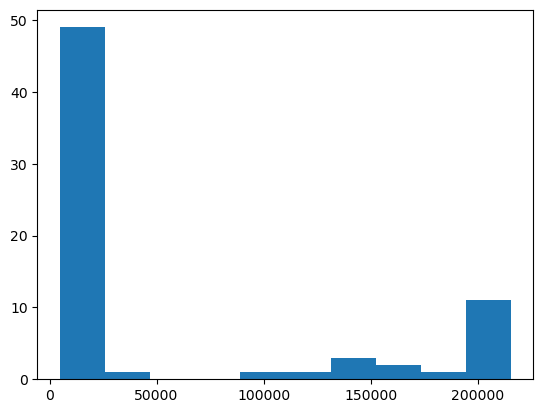

In [139]:
cadet_blue_price = df_no[(df_no['price'] > 1551) & (df_no['price'] < 220000)]['price']
count, bin, fig = plt.hist(cadet_blue_price)

In [140]:
print(count, bin)

[49.  1.  0.  0.  1.  1.  3.  2.  1. 11.] [  4897.   25957.3  47017.6  68077.9  89138.2 110198.5 131258.8 152319.1
 173379.4 194439.7 215500. ]


In [141]:
df_no[df_no['price'] < 25957.3]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,already_build,price_color
554,20 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885327,-121.289412,off_plan,cadetblue
555,24 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885132,-121.289405,off_plan,cadetblue
556,28 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884936,-121.289397,off_plan,cadetblue
557,32 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884741,-121.289390,off_plan,cadetblue
558,36 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884599,-121.289406,off_plan,cadetblue
559,40 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884535,-121.289619,off_plan,cadetblue
560,44 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884590,-121.289835,off_plan,cadetblue
561,48 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884667,-121.289896,off_plan,cadetblue
562,52 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884780,-121.289911,off_plan,cadetblue
563,68 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885236,-121.289928,off_plan,cadetblue


The strange cadetblue properties gathering on the top of Sacramento is weird. But, I don't think I can get anything out of the current data. I'll need more info. 